Prediction of Surplus Food Production

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [ ]:
# loading the data from csv file to pandas dataframe
food_dataset = pd.read_csv('/content/databse ml.csv')

In [ ]:
food_dataset.head()

,year,sector,food_type,tons_supply,tons_surplus,tons_waste,tons_uneaten,tons_anaerobically_digested,tons_composted,tons_landfilled,meals_wasted
0,2019,Farm,Dry Goods,6.428605e+06,1.230837e+06,1.081247e+06,1.201759e+06,0.000000,0.000000,24666.802930,2.002932e+09
1,2019,Farm,Produce,9.544273e+07,1.551747e+07,1.362843e+07,1.526485e+07,0.000000,0.000000,185655.329100,2.544142e+10
2,2019,Foodservice,Breads & Bakery,3.110773e+04,5.708086e+02,4.821472e+02,5.564499e+02,0.144755,72.229657,432.694805,9.274164e+05
3,2019,Foodservice,Dairy & Eggs,1.479832e+04,2.715404e+02,2.293631e+02,2.647098e+02,0.068862,34.360502,205.838034,4.411830e+05
4,2019,Foodservice,Dry Goods,2.645191e+04,4.853770e+02,4.099854e+02,4.731673e+02,0.123090,61.419216,367.934404,7.886122e+05


In [ ]:
# checking the number of rows and columns
food_dataset.shape

(2900, 11)

In [ ]:
# getting some information about the dataset
food_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         2900 non-null   int64  
 1   sector                       2900 non-null   object 
 2   food_type                    2900 non-null   object 
 3   tons_supply                  2900 non-null   float64
 4   tons_surplus                 2900 non-null   float64
 5   tons_waste                   2900 non-null   float64
 6   tons_uneaten                 2900 non-null   float64
 7   tons_anaerobically_digested  2900 non-null   float64
 8   tons_composted               2900 non-null   float64
 9   tons_landfilled              2900 non-null   float64
 10  meals_wasted                 2900 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 249.3+ KB


In [ ]:
# checking the number of missing values
food_dataset.isnull().sum()

year                           0
sector                         0
food_type                      0
tons_supply                    0
tons_surplus                   0
tons_waste                     0
tons_uneaten                   0
tons_anaerobically_digested    0
tons_composted                 0
tons_landfilled                0
meals_wasted                   0
dtype: int64

In [26]:
 #checking the distribution of categorical data
print(food_dataset.sector.value_counts())
print(food_dataset.food_type.value_counts())

Foodservice      2640
Manufacturing      80
Residential        80
Retail             80
Farm               20
Name: sector, dtype: int64
Dry Goods                   390
Produce                     380
Dairy & Eggs                380
Prepared Foods              380
Breads & Bakery             370
Fresh Meat & Seafood        370
Ready-to-drink Beverages    370
Frozen                      260
Name: food_type, dtype: int64


Encoding the categorical data 

In [44]:
# encoding "sector" Column
food_dataset.replace({'sector':{'Foodservice':0,'Manufacturing':1,'Residential':2,'Retail':3,'Farm':3}},inplace=True)



In [46]:
# encoding "food_type" Column
food_dataset.replace({'food_type':{'Dry Goods':0,'Produce':1,'Dairy & Eggs':2,'Prepared Foods':3,'Breads & Bakery':3,'Fresh Meat & Seafood':4,'Ready-to-drink Beverages':5,'Frozen':6}},inplace=True)


In [47]:
food_dataset.head()

,year,sector,food_type,tons_supply,tons_surplus,tons_waste,tons_uneaten,tons_anaerobically_digested,tons_composted,tons_landfilled,meals_wasted
0,2019,3,0,6.428605e+06,1.230837e+06,1.081247e+06,1.201759e+06,0.000000,0.000000,24666.802930,2.002932e+09
1,2019,3,1,9.544273e+07,1.551747e+07,1.362843e+07,1.526485e+07,0.000000,0.000000,185655.329100,2.544142e+10
2,2019,0,3,3.110773e+04,5.708086e+02,4.821472e+02,5.564499e+02,0.144755,72.229657,432.694805,9.274164e+05
3,2019,0,2,1.479832e+04,2.715404e+02,2.293631e+02,2.647098e+02,0.068862,34.360502,205.838034,4.411830e+05
4,2019,0,0,2.645191e+04,4.853770e+02,4.099854e+02,4.731673e+02,0.123090,61.419216,367.934404,7.886122e+05


Splitting the data and target

In [56]:
X = food_dataset.drop(['tons_supply','tons_surplus'],axis=1)
Y = food_dataset['tons_surplus']

In [57]:
print(X)

      year  sector  food_type    tons_waste  tons_uneaten  \
0     2019       3          0  1.081247e+06  1.201759e+06   
1     2019       3          1  1.362843e+07  1.526485e+07   
2     2019       0          3  4.821472e+02  5.564499e+02   
3     2019       0          2  2.293631e+02  2.647098e+02   
4     2019       0          0  4.099854e+02  4.731673e+02   
...    ...     ...        ...           ...           ...   
2895  2010       3          4  1.518201e+05  3.577484e+05   
2896  2010       3          6  2.144287e+05  4.955690e+05   
2897  2010       3          3  6.265419e+04  1.448010e+05   
2898  2010       3          1  1.084874e+06  2.507268e+06   
2899  2010       3          5  3.028817e+05  4.997456e+05   

      tons_anaerobically_digested  tons_composted  tons_landfilled  \
0                        0.000000        0.000000     24666.802930   
1                        0.000000        0.000000    185655.329100   
2                        0.144755       72.229657       4

In [58]:
print(Y)

0       1.230837e+06
1       1.551747e+07
2       5.708086e+02
3       2.715404e+02
4       4.853770e+02
            ...     
2895    4.434897e+05
2896    6.126259e+05
2897    1.790040e+05
2898    3.099502e+06
2899    6.650892e+05
Name: tons_surplus, Length: 2900, dtype: float64


In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [60]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [61]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [62]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [63]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9986560245506682


Visualising actual and predicted value

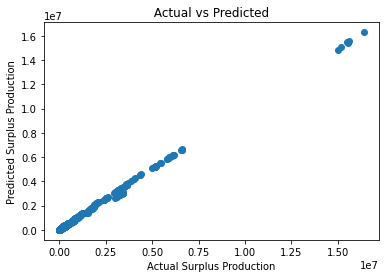

In [65]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

In [66]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [68]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9996881115624042


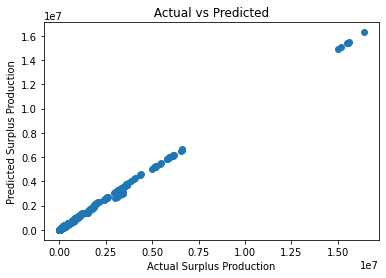

In [75]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

Lasso Regression

In [70]:
# loading the linear regression model
lass_reg_model = Lasso()

In [71]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [72]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [73]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9986508137464466


Visualising actual and predicted value

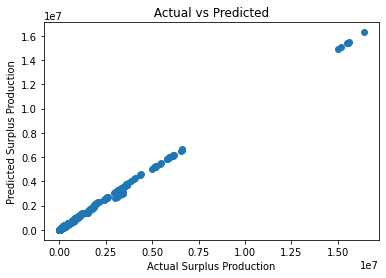

In [74]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Surplus Production")
plt.ylabel("Predicted Surplus Production")
plt.title(" Actual vs Predicted ")
plt.show()

In [76]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [77]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9996711978585683


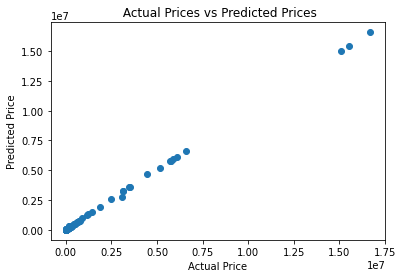

In [78]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()